**Enter you ID and Name here**


Name: Md. Shakibul Islam Ramim
ID: 2125051063
7B1

The heart disease dataset will be used for this task. This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

**Attributes**
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholesterol in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by fluoroscopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversible defect
14. target


Before completing each task, create a text cell and write the name of that task there. For example

(Task 01.1)

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np


In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
df = pd.read_csv('/content/drive/MyDrive/ML Lab/Week 8/heart.csv')

In [61]:
#how many missiong values are there in each column of the dataset
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


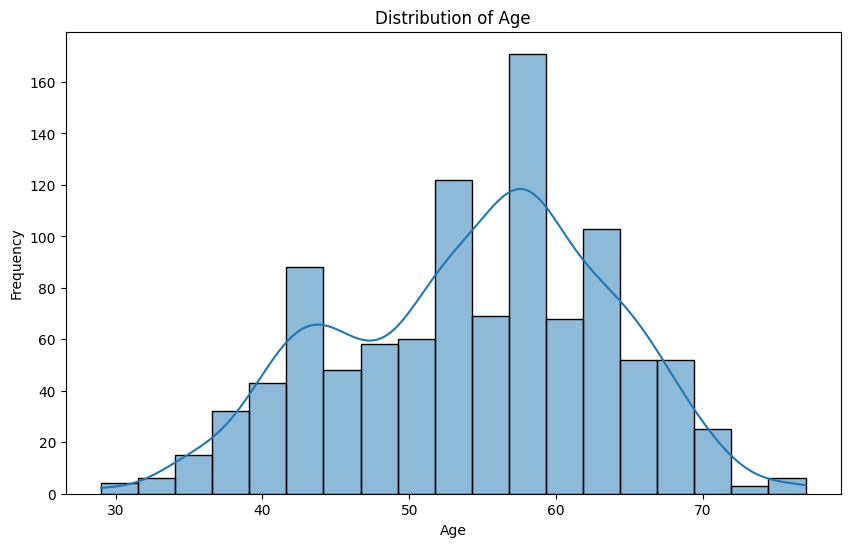

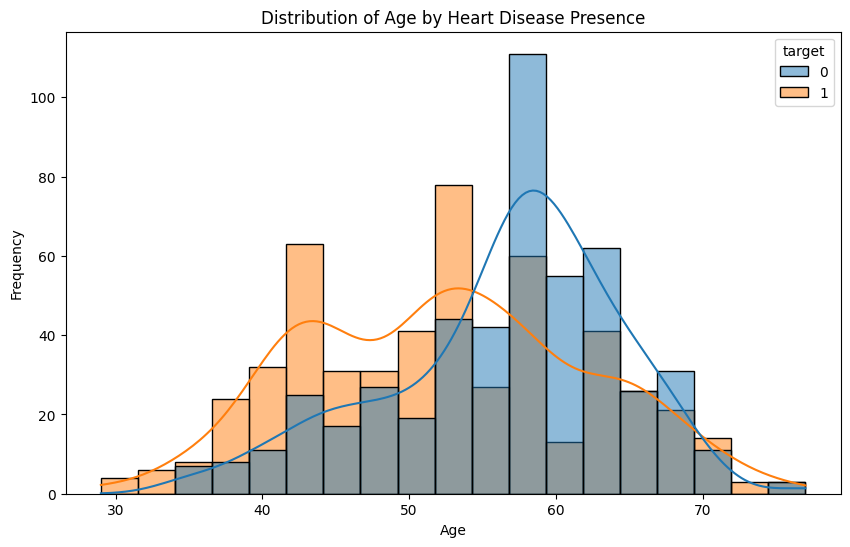

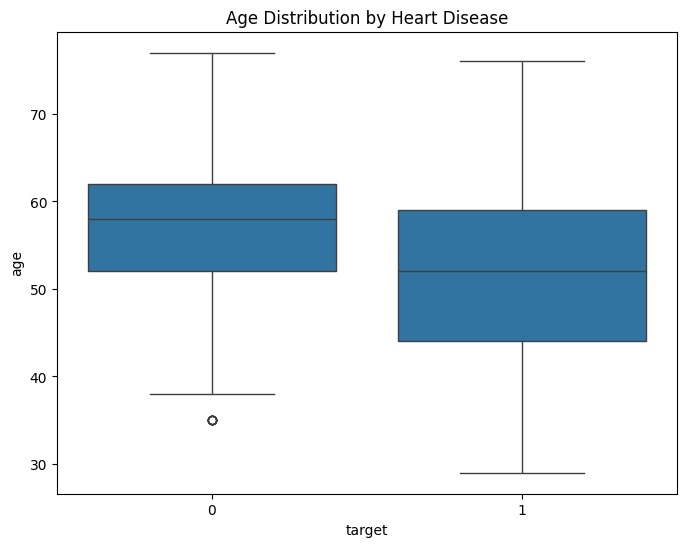

        count       mean       std   min   25%   50%   75%   max
target                                                          
0       499.0  56.569138  7.908153  35.0  52.0  58.0  62.0  77.0
1       526.0  52.408745  9.631804  29.0  44.0  52.0  59.0  76.0


In [62]:
#2 What is the distribution of ages in the dataset, and how does it vary with the presence of heart disease?
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Age distribution by heart disease presence
plt.figure(figsize=(10, 6))
sns.histplot(x='age', hue='target', data=df, kde=True)
plt.title('Distribution of Age by Heart Disease Presence')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Boxplot of age vs. target
plt.figure(figsize=(8,6))
sns.boxplot(x='target',y='age',data=df)
plt.title('Age Distribution by Heart Disease')
plt.show()

# Calculate descriptive statistics for age grouped by target
print(df.groupby('target')['age'].describe())

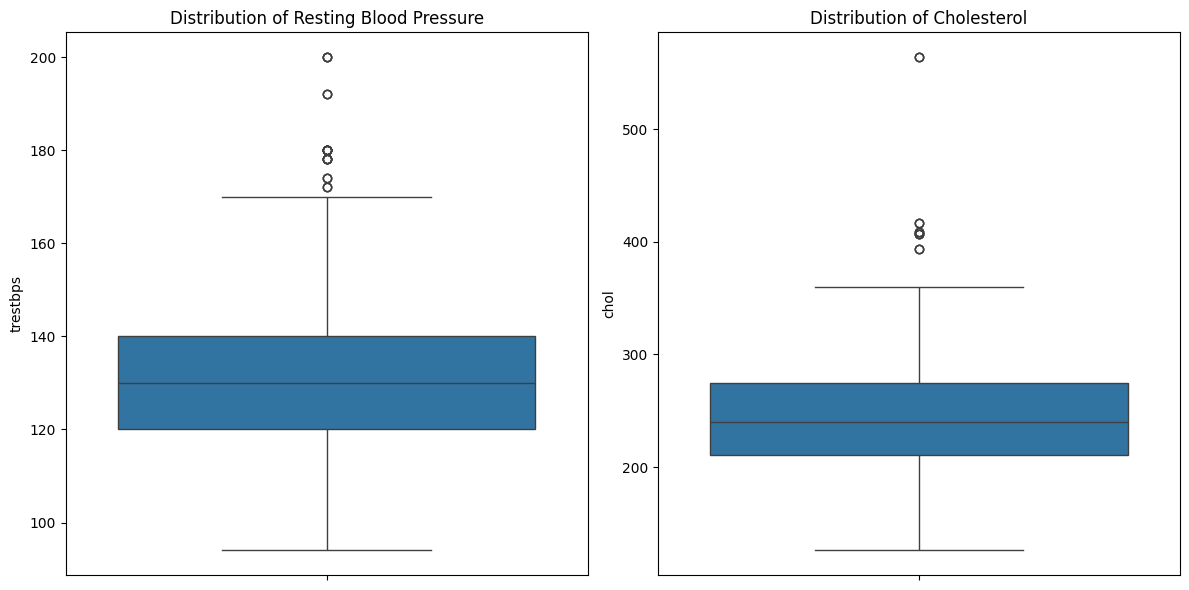

          trestbps        chol
count  1025.000000  1025.00000
mean    131.611707   246.00000
std      17.516718    51.59251
min      94.000000   126.00000
25%     120.000000   211.00000
50%     130.000000   240.00000
75%     140.000000   275.00000
max     200.000000   564.00000
Outliers in 'trestbps':
 29     180
47     178
87     174
137    180
151    192
175    200
229    178
246    192
257    180
294    200
326    192
343    172
396    180
436    174
452    178
496    180
508    200
509    180
528    178
609    180
624    178
636    174
679    180
688    200
837    172
891    180
896    178
944    178
971    172
986    180
Name: trestbps, dtype: int64

Outliers in 'chol':
 123    417
158    564
179    409
192    564
255    394
450    407
464    564
481    407
542    394
578    394
641    409
665    417
685    407
889    407
958    417
996    409
Name: chol, dtype: int64


In [63]:
# prompt: Are there any outliers in the resting blood pressure and cholesterol features, and how might they affect the analysis?
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y='trestbps', data=df)
plt.title('Distribution of Resting Blood Pressure')

plt.subplot(1, 2, 2)
sns.boxplot(y='chol', data=df)
plt.title('Distribution of Cholesterol')

plt.tight_layout()
plt.show()

#Further investigation of potential outliers
print(df[['trestbps', 'chol']].describe())

#Identify outliers using IQR method
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

outliers_trestbps = find_outliers_iqr(df['trestbps'])
outliers_chol = find_outliers_iqr(df['chol'])
print("Outliers in 'trestbps':\n", outliers_trestbps)
print("\nOutliers in 'chol':\n", outliers_chol)




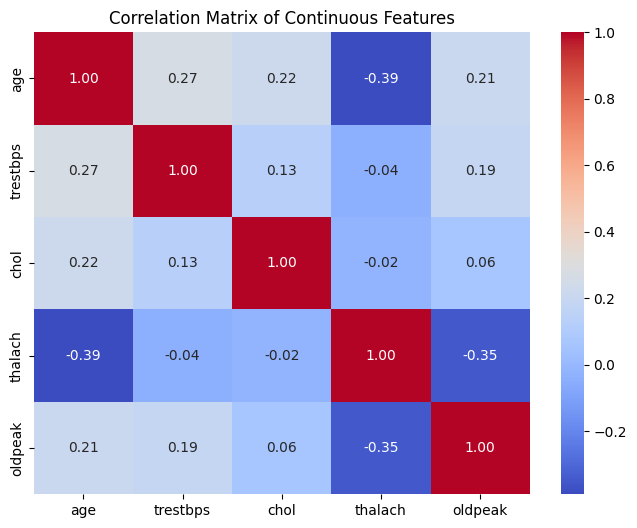

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.271121,0.219823,-0.390227,0.208137
trestbps,0.271121,1.000000,0.127977,-0.039264,0.187434
chol,0.219823,0.127977,1.000000,-0.021772,0.064880
thalach,-0.390227,-0.039264,-0.021772,1.000000,-0.349796
oldpeak,0.208137,0.187434,0.064880,-0.349796,1.000000


In [64]:
#4.What is the correlation between the continuous features, and how might these relationships

# Calculate the correlation matrix for continuous features
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
correlation_matrix = df[continuous_features].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Continuous Features')
plt.show()


correlation_matrix

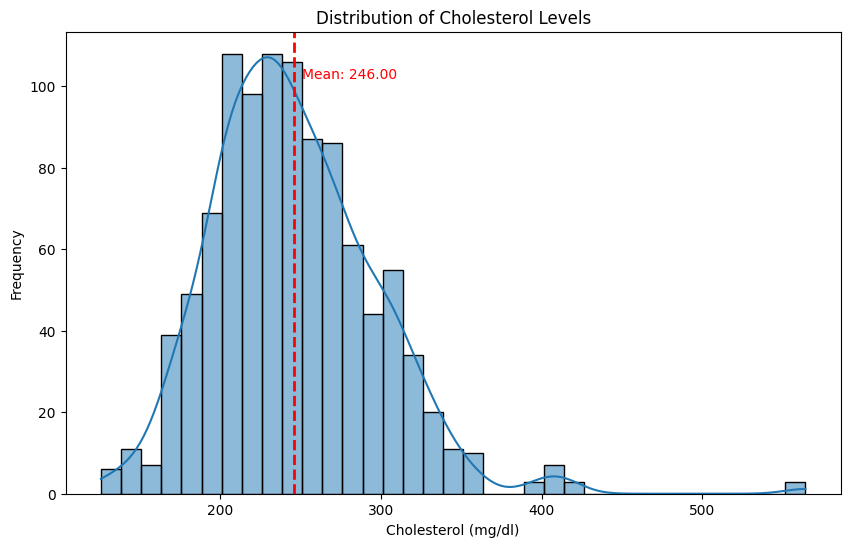

In [65]:
# prompt: Can you create a histogram of cholesterol levels and annotate the mean value on the plot?

# Calculate the mean cholesterol level
mean_chol = df['chol'].mean()

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['chol'], kde=True)
plt.title('Distribution of Cholesterol Levels')
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Frequency')

# Annotate the mean value on the plot
plt.axvline(mean_chol, color='red', linestyle='dashed', linewidth=2)
plt.text(mean_chol + 5, plt.ylim()[1] * 0.9, f'Mean: {mean_chol:.2f}', color='red')

plt.show()

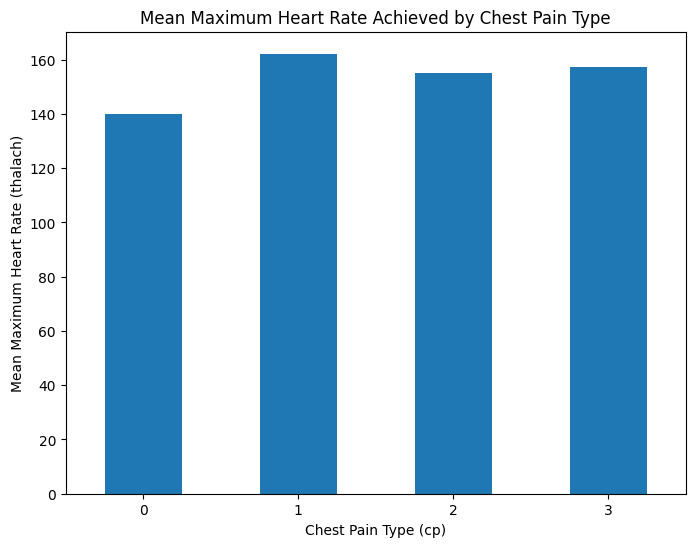

,thalach
cp,
0,140.052314
1,162.179641
2,155.116197
3,157.129870


In [66]:
#6.How does the maximum heart rate achieved vary across different types of chest pain?

chest_pain_thalach = df.groupby('cp')['thalach'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
chest_pain_thalach.plot(kind='bar')
plt.title('Mean Maximum Heart Rate Achieved by Chest Pain Type')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Mean Maximum Heart Rate (thalach)')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

chest_pain_thalach

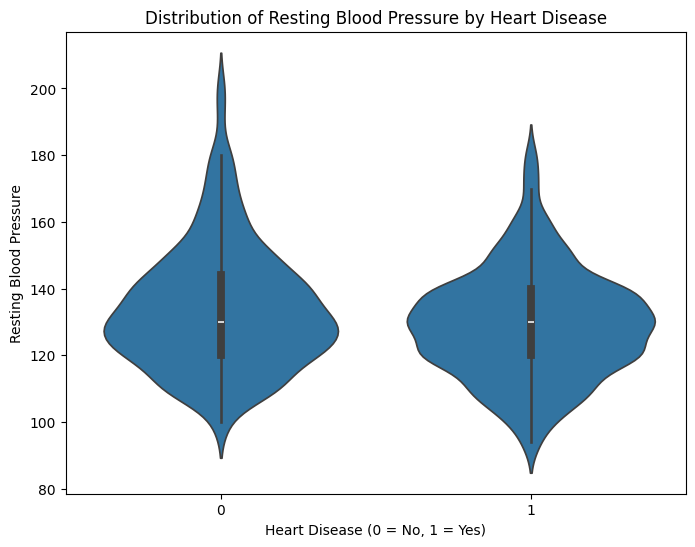

In [67]:
#7. Can you visualize the distribution of resting blood pressure using a violin plot, separated by
# heart disease presence?

# Create the violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='target', y='trestbps', data=df)
plt.title('Distribution of Resting Blood Pressure by Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Resting Blood Pressure')
plt.show()

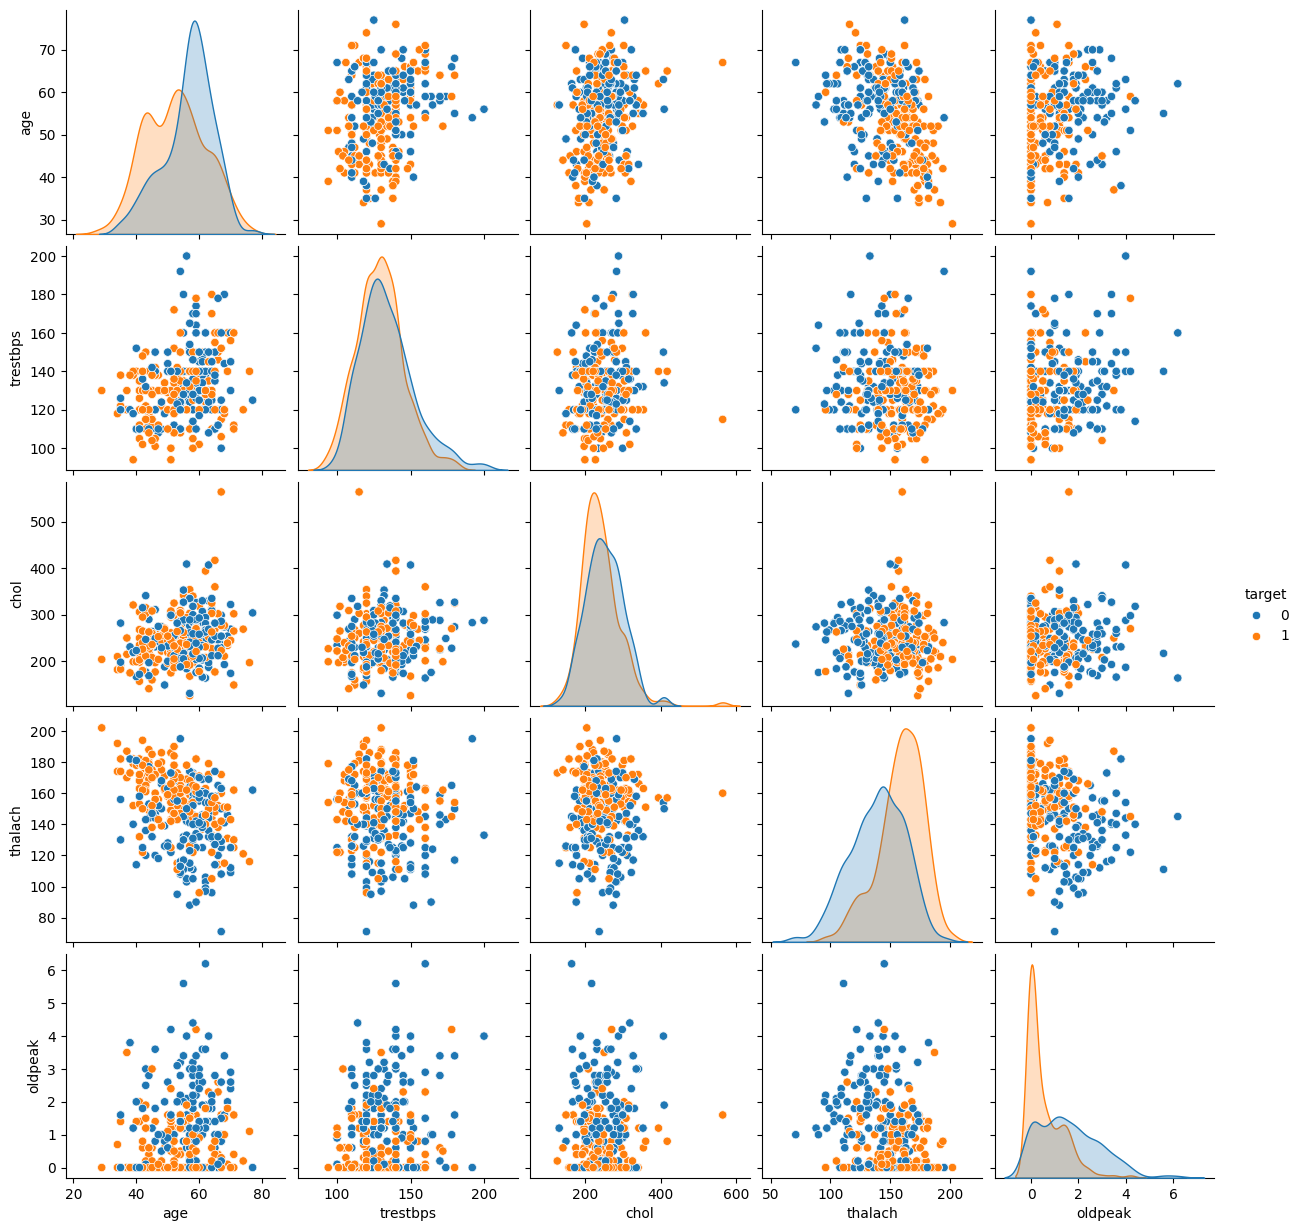

In [68]:
#8. Create a pair plot for the continuous features, colored by the presence of heart disease. What patterns do you observe?

# Create the pair plot
sns.pairplot(df, vars=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], hue='target')
plt.show()

In [69]:
#10. How would you handle categorical variables like chest pain type and resting ECG results for modeling? with out error

# Use one-hot encoding for categorical features
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'ca', 'thal'], drop_first=True)

In [71]:
# prompt: Based on the distributions of continuous features, would any benefit from
# normalization or scaling?

# Based on the distributions observed in the provided code ,
# yes sir,I think some continuous features might benefit from normalization or scaling.

# 'trestbps' (resting blood pressure) and 'chol' (serum cholesterol) show potential outliers.
#  Scaling using standardization (StandardScaler) or MinMaxScaler can mitigate the influence of these outliers
# on distance-based algorithms (like k-NN) or models sensitive to feature scales (like SVM or neural networks).

# 'thalach' (maximum heart rate achieved) appears to have a somewhat skewed distribution.
# Normalization or standardization could help make it more normally distributed, potentially improving the
# performance of some algorithms that assume normal distributions.

# 'age' shows a distribution that might not drastically need transformation, but scaling could still be beneficial
# if used in conjunction with features that have very different ranges.

# 'oldpeak' also seems to have a skewed distribution, so scaling would be helpful.

# In summary: 'trestbps', 'chol', 'thalach' and 'oldpeak' would likely benefit from normalization or standardization.
# 'age' might benefit depending on other features in the dataset and the algorithm used.  It's best to experiment.

# Example of how to apply StandardScaler:

from sklearn.preprocessing import StandardScaler

# Assuming 'X' contains the features and 'y' contains the target variable
# You need to prepare the dataset for scaling by removing non-numeric features (the 'target' column)
X = df.drop('target', axis=1)
y = df['target']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the continuous features
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X[continuous_features] = scaler.fit_transform(X[continuous_features])

# Now X contains the scaled continuous features, ready for model training.

In [ ]:
# Yes, new features can be engineered from existing ones like age and cholesterol levels to improve model performance. For instance, you could create an interaction feature by multiplying age and cholesterol (e.g., `age * cholesterol`) to capture the combined effect. You could also define a binary "high-risk" flag based on thresholds, such as setting `high_risk = 1` if both age > 60 and cholesterol > 240. Alternatively, age and cholesterol could be categorized into bins (e.g., `young`, `middle-aged`, `old` for age, and `normal`, `borderline`, `high` for cholesterol), and the combinations could create new categorical features. Polynomial features, such as `age^2` or `cholesterol^2`, might reveal non-linear relationships, while ratios like `age / cholesterol` could highlight patterns where one factor disproportionately influences risk. These engineered features help models better identify patterns and improve predictions.

In [72]:
#12.How would you address any imbalances in the dataset regarding the presence of heart disease?

# Check class distribution
class_counts = df['target'].value_counts()
print(class_counts)

# Calculate the imbalance ratio
imbalance_ratio = class_counts[0] / class_counts[1]
print(f"Imbalance Ratio (No Disease / Disease): {imbalance_ratio}")

# Address Imbalance (example using SMOTE)
from imblearn.over_sampling import SMOTE

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Initialize SMOTE
smote = SMOTE(random_state=42)  # Set random_state for reproducibility

# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)


# Check the class distribution after resampling
resampled_counts = pd.Series(y_resampled).value_counts()
resampled_counts

# Now use X_resampled and y_resampled for model training

target
1    526
0    499
Name: count, dtype: int64
Imbalance Ratio (No Disease / Disease): 0.9486692015209125


,count
target,
0,526
1,526


Accuracy: 0.8436018957345972


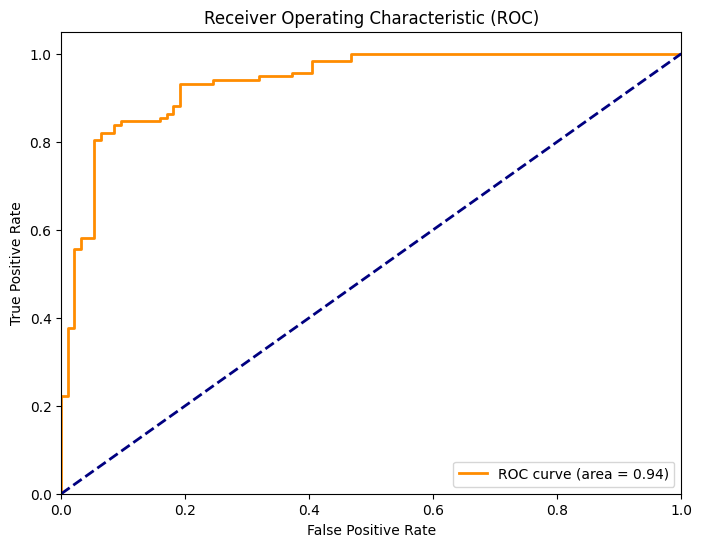

In [73]:
#13.Train a Logistic Regression model and evaluate its performance using accuracy and the ROC curve. How does it perform?

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Assuming X_resampled and y_resampled are from the previous code block
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(solver='liblinear') # Using 'liblinear' solver for smaller datasets
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Compute ROC curve and AUC
y_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Interpretation of results:
# The accuracy score indicates the overall correctness of the model's predictions.
# The ROC curve and AUC visualize the model's ability to distinguish between classes at various thresholds.
# An AUC of 1 represents a perfect classifier, while an AUC of 0.5 suggests random performance.

In [76]:
#14.How does the performance of a Decision Tree classifier compare with a Random Forest for
# predicting heart disease presence?

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Assuming X_resampled, y_resampled, X_train, X_test, y_train, y_test are defined from previous code

# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy}")

# Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")



Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0


Naive Bayes Accuracy: 0.8530805687203792


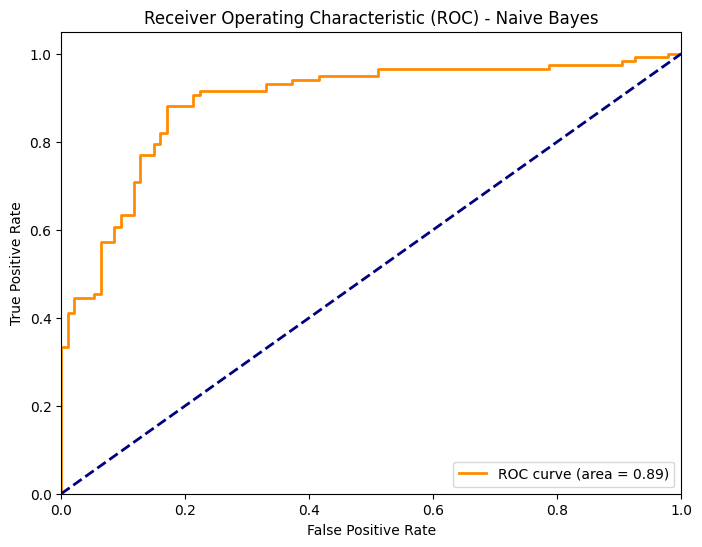

In [77]:
#15.Implement a Naïve Bayes classifier and discuss its suitability for this dataset. What
# assumptions does it make about the features?

from sklearn.naive_bayes import GaussianNB

# Assuming X_resampled and y_resampled are available from previous code blocks
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train the Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy}")

# Compute ROC curve and AUC
y_prob = gnb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

# Discussion of Suitability and Assumptions:
#
# Suitability:
# Naive Bayes can be a good choice for this dataset due to its simplicity and speed.
# It's particularly useful for classification tasks with a relatively small number of features.
# However, its performance heavily relies on the assumption of feature independence.
#
# Assumptions:
# 1. Feature Independence:  The core assumption of Naive Bayes is that features are conditionally independent given the class label.  In the heart disease dataset, this assumption may not entirely hold true. For example, resting blood pressure and maximum heart rate might be related.  Violating this assumption can lead to suboptimal performance.

# 2. Feature Distribution:  Gaussian Naive Bayes assumes that the features are normally distributed (Gaussian) for each class.  Checking the histograms of the features can confirm if this assumption holds.  If features significantly deviate from normal distributions, the performance may be affected. Consider transformations if distributions are heavily skewed.

In [ ]:
# prompt: Which kernel in Support Vector Machine works best for this dataset, and how do you determine
# the optimal parameters?

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Assuming X_resampled and y_resampled are available from previous code blocks
# ... (your previous code)

# Define the parameter grid for the SVM
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001], # Kernel coefficient
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'] # Kernel type
}

# Initialize the SVM classifier
svc = SVC(probability=True) #probability=True for ROC curve calculation

# Initialize GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

# Train the best model with the whole training set.
best_svc = SVC(**best_params, probability=True)
best_svc.fit(X_train,y_train)

# Make predictions on the test set
y_pred = best_svc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


# Compute ROC curve and AUC
y_prob = best_svc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - SVM')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# prompt: . Although it's a classification problem, as an exercise, predict the 'Oldpeak' using Linear
# Regression. What is the R² score?

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming X_resampled and y_resampled are available from previous code blocks
# ... (your previous code)

# Prepare the data for linear regression
X = X_resampled[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'slope', 'ca', 'thal']]
y = X_resampled['oldpeak']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")

In [ ]:
# prompt: . How would a Decision Tree Regressor perform in predicting resting blood pressure, and how
# can overfitting be prevented?

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


# Assuming your data is in a pandas DataFrame called 'df'
# and 'trestbps' is the resting blood pressure column, and 'target' is the other relevant features
X = df.drop('trestbps', axis=1)  # Features
y = df['trestbps']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)


# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]   # Minimum number of samples required to be at a leaf node
}


# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_dt_regressor = DecisionTreeRegressor(**best_params, random_state=42)
best_dt_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_dt_regressor.predict(X_test)


# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

#Preventing Overfitting
# 1. Hyperparameter Tuning: Use GridSearchCV (as shown above) to find the optimal hyperparameters (max_depth, min_samples_split, min_samples_leaf) for your decision tree, which helps to control the complexity of the tree.
# 2. Pruning: Prune the tree by setting a `max_depth` and/or restricting `min_samples_leaf`.  This reduces the tree's depth, preventing it from learning fine details from the training data that may not generalize to new data.
# 3. Cross-Validation: Employ techniques like k-fold cross-validation during training to get a more realistic assessment of the model's performance on unseen data. This will help you identify if the model is overfitting.
# 4. Feature Selection: If you have many features, select only the most important ones using feature importance scores provided by the DecisionTreeRegressor. This reduces the model's complexity.
# 5. Ensemble Methods: Instead of relying on a single decision tree, consider ensemble methods like RandomForestRegressor or GradientBoostingRegressor. These methods combine multiple decision trees, reducing the risk of overfitting by averaging predictions from different trees trained on subsets of the data.

In [ ]:
# prompt: Use Support Vector Machine Regression to predict maximum heart rate. How do different
# kernels affect the prediction?

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
# ... (Your existing code)

# Prepare the data
X = X_resampled.drop('thalach', axis=1)  # Features (excluding 'thalach')
y = X_resampled['thalach']  # Target variable ('thalach')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define kernels to test
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    # Initialize and train the SVR model with different kernels
    svr = SVR(kernel=kernel)
    svr.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svr.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Kernel: {kernel}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("-" * 20)

In [ ]:
# prompt:  Apply Random Forest Regression to predict cholesterol levels. How does the model
# performance vary with the number of estimators?

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'df'
# and 'chol' is the cholesterol column, and 'target' (or other relevant features) are the predictors

# Prepare the data
X = df.drop('chol', axis=1)  # Features (excluding 'chol')
y = df['chol']  # Target variable ('chol')


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Number of estimators to test
n_estimators_list = [10, 50, 100, 200, 500]

# Store results
mse_scores = []
r2_scores = []


for n_estimators in n_estimators_list:
    # Initialize and train the RandomForestRegressor
    rf_regressor = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf_regressor.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_regressor.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_scores.append(mse)
    r2_scores.append(r2)

    print(f"Number of estimators: {n_estimators}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("-" * 20)


# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, mse_scores, marker='o', label='Mean Squared Error')
plt.plot(n_estimators_list, r2_scores, marker='x', label='R-squared')
plt.xlabel("Number of Estimators")
plt.ylabel("Score")
plt.title("Random Forest Regression Performance vs. Number of Estimators")
plt.legend()
plt.grid(True)
plt.show()